In [1]:
import pandas as pd

In [2]:
pd.__version__

'1.4.2'

In [3]:
!pip install pyarrow

     |███████▉                        | 9.8 MB 52.7 MB/s eta 0:00:01

     |█████████████                   | 16.4 MB 52.7 MB/s eta 0:00:01

     |██████████████████▏             | 22.7 MB 52.7 MB/s eta 0:00:01

     |███████████████████████▉        | 29.9 MB 52.7 MB/s eta 0:00:01

     |████████████████████████████▍   | 35.5 MB 52.7 MB/s eta 0:00:01

     |████████████████████████████████| 40.1 MB 52.7 MB/s eta 0:00:01

     |████████████████████████████████| 40.1 MB 52.7 MB/s 


In [4]:
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-01.parquet')

In [5]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


In [17]:
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
sk.__version__

'1.0.2'

In [8]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [9]:
len(df.columns) - 1

18

In [10]:
df.shape

(2964624, 19)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2964624 entries, 0 to 2964623
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [24]:
df.isna().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          140162
trip_distance                 0
RatecodeID               140162
store_and_fwd_flag       140162
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     140162
Airport_fee              140162
dtype: int64

In [26]:
new = df.drop(columns=['congestion_surcharge', 'passenger_count', 'Airport_fee', 'RatecodeID', 'store_and_fwd_flag'])

In [29]:
new.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,2964624.0,1.754204,0.432590,1.0,2.00,2.00,2.00,6.00
trip_distance,2964624.0,3.652169,225.462572,0.0,1.00,1.68,3.11,312722.30
PULocationID,2964624.0,166.017884,63.623914,1.0,132.00,162.00,234.00,265.00
DOLocationID,2964624.0,165.116712,69.315350,1.0,114.00,162.00,234.00,265.00
payment_type,2964624.0,1.161271,0.580869,0.0,1.00,1.00,1.00,4.00
fare_amount,2964624.0,18.175062,18.949548,-899.0,8.60,12.80,20.50,5000.00
extra,2964624.0,1.451598,1.804102,-7.5,0.00,1.00,2.50,14.25
mta_tax,2964624.0,0.483382,0.117760,-0.5,0.50,0.50,0.50,4.00
tip_amount,2964624.0,3.335870,3.896551,-80.0,1.00,2.70,4.12,428.00
tolls_amount,2964624.0,0.527021,2.128310,-80.0,0.00,0.00,0.00,115.92


In [27]:
correlation = new.corr()

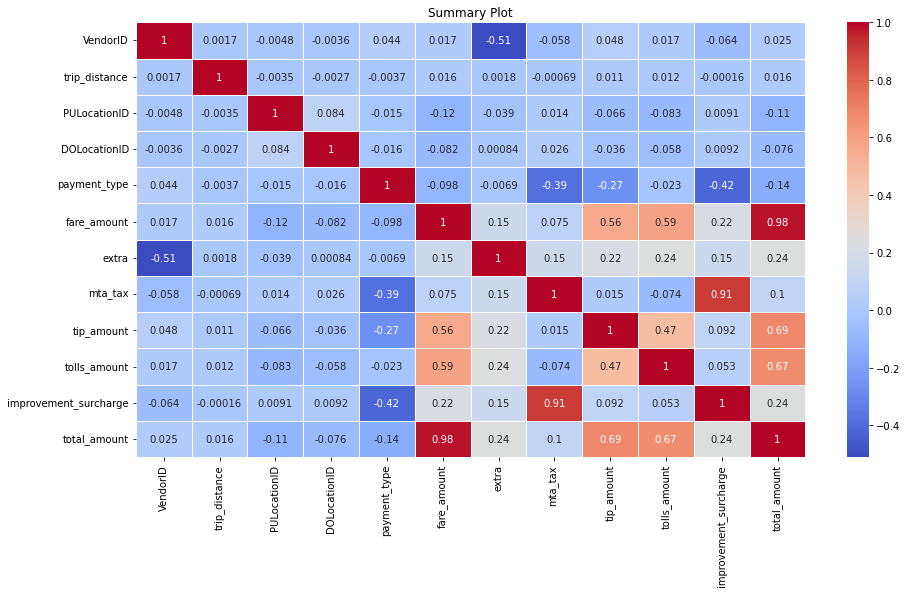

In [28]:
plt.figure(figsize=(15, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Summary Plot')
plt.show()